In [7]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Arc




In [3]:
df=pd.read_csv('player_datafinaal.csv')
df.head()


,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,confidence,ball_pos_x,ball_pos_y
0,1,0,630.996643,694.224426,658.353699,756.565613,644,756,[ 161.98 194.25 177.03],1,NaN,NaN,NaN
1,2,0,750.786987,506.141998,775.934692,561.066833,763,561,[ 161.98 194.25 177.03],1,NaN,NaN,NaN
2,3,0,1184.698364,754.104309,1211.806396,813.816467,1198,813,[ 161.98 194.25 177.03],1,NaN,NaN,NaN
3,4,0,671.253662,733.565063,707.921814,784.092651,689,784,[ 161.98 194.25 177.03],1,NaN,NaN,NaN
4,5,0,1352.144897,538.061829,1375.958496,597.522278,1364,597,[ 65.129 92.933 100.44],2,NaN,NaN,NaN


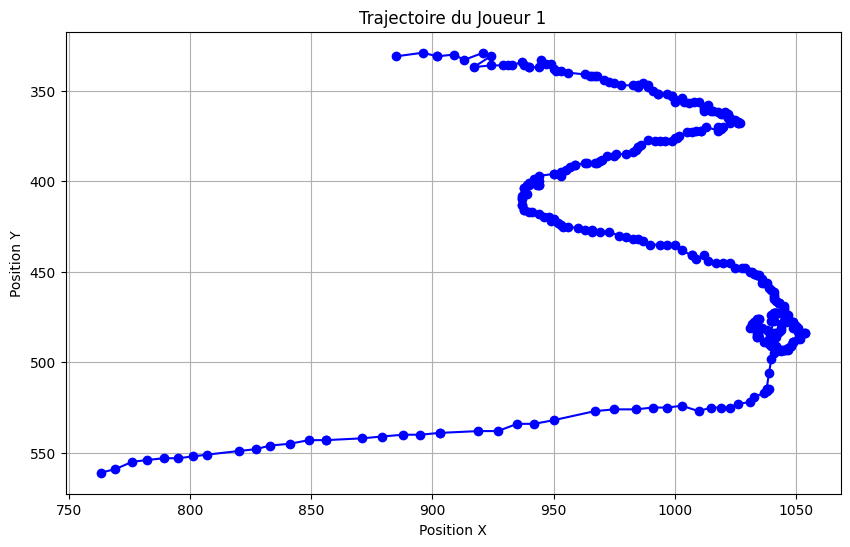

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV

# Filtrer les données pour le joueur 1
joueur_1 = df[df['player_id'] == 2]

# Tracer la trajectoire
plt.figure(figsize=(10, 6))
plt.plot(joueur_1['position_x'], joueur_1['position_y'], marker='o', linestyle='-', color='blue')
plt.title("Trajectoire du Joueur 1")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.grid(True)
plt.gca().invert_yaxis()  # Inverser l’axe Y si nécessaire (caméra du haut)
plt.show()


In [18]:
# === fichier : homographie_creator.py ===
import numpy as np
import cv2 as cv

click_stage = 0
src1_points, dst1_points = [], []
src2_points, dst2_points = [], []

H = {
    "H1": None,
    "H2": None
}

def mouse_callback(event, x, y, flags, param):
    global click_stage

    if event == cv.EVENT_LBUTTONDOWN:
        if click_stage == 0:
            src1_points.append([x, y])
            cv.circle(src1_copy, (x, y), 5, (0, 255, 0), -1)
            print(f"src1 point: {x},{y}")
            click_stage = 1
        elif click_stage == 1:
            dst1_points.append([x, y])
            cv.circle(dst_copy, (x, y), 5, (0, 255, 0), -1)
            print(f"dst for src1 point: {x},{y}")
            click_stage = 2
        elif click_stage == 2:
            src2_points.append([x, y])
            cv.circle(src2_copy, (x, y), 5, (255, 0, 0), -1)
            print(f"src2 point: {x},{y}")
            click_stage = 3
        elif click_stage == 3:
            dst2_points.append([x, y])
            cv.circle(dst_copy, (x, y), 5, (255, 0, 0), -1)
            print(f"dst for src2 point: {x},{y}")
            click_stage = 0

def calculate_and_warp():
    global H

    if len(src1_points) >= 4 and len(dst1_points) >= 4:
        H["H1"], _ = cv.findHomography(np.array(src1_points), np.array(dst1_points), cv.RANSAC)
        warped1 = cv.warpPerspective(src1, H["H1"], (dst.shape[1], dst.shape[0]))
        print("✅ H1 calculée.")
    else:
        warped1 = np.zeros_like(dst)

    if len(src2_points) >= 4 and len(dst2_points) >= 4:
        H["H2"], _ = cv.findHomography(np.array(src2_points), np.array(dst2_points), cv.RANSAC)
        warped2 = cv.warpPerspective(src2, H["H2"], (dst.shape[1], dst.shape[0]))
        print("✅ H2 calculée.")
    else:
        warped2 = np.zeros_like(dst)

    merged = np.maximum(warped1, warped2)
    cv.imshow("Plan Fusionné", merged)

    np.save("homographies.npy", H)
    print("📁 Matrices d'homographie sauvegardées dans 'homographies.npy'")

# Chargement des images
src1 = cv.imread("C:/Users/HP GAMING/Desktop/AI/computer vision/match/input_video/fina1.png")
src2 = cv.imread("C:/Users/HP GAMING/Desktop/AI/computer vision/match/input_video/fina2.png")
dst = cv.imread("C:/Users/HP GAMING/Desktop/AI/computer vision/match/dst.jpg")

src1 = cv.resize(src1, (600, 400))
src2 = cv.resize(src2, (600, 400))
dst = cv.resize(dst, (600, 400))

src1_copy = src1.copy()
src2_copy = src2.copy()
dst_copy = dst.copy()

cv.namedWindow("src1")
cv.setMouseCallback("src1", mouse_callback)
cv.namedWindow("src2")
cv.setMouseCallback("src2", mouse_callback)
cv.namedWindow("dst")
cv.setMouseCallback("dst", mouse_callback)

while True:
    cv.imshow("src1", src1_copy)
    cv.imshow("src2", src2_copy)
    cv.imshow("dst", dst_copy)

    key = cv.waitKey(1) & 0xFF
    if key == ord('h'):
        calculate_and_warp()
    elif key == ord('q'):
        break

cv.destroyAllWindows()


src1 point: 337,98
dst for src1 point: 574,24
src2 point: 73,95
dst for src2 point: 31,23
src1 point: 47,120
dst for src1 point: 299,25
src2 point: 379,99
dst for src2 point: 303,26
src1 point: 81,328
dst for src1 point: 303,380
src2 point: 390,300
dst for src2 point: 303,384
src1 point: 57,160
dst for src1 point: 302,144
src2 point: 383,140
dst for src2 point: 304,144
src1 point: 63,208
dst for src1 point: 302,262
src2 point: 54,167
dst for src2 point: 100,248
src1 point: 285,120
dst for src1 point: 499,115
src2 point: 384,184
dst for src2 point: 300,260
src1 point: 421,200
dst for src1 point: 501,288
src2 point: 135,116
dst for src2 point: 102,116
src1 point: 360,166
dst for src1 point: 500,249
src2 point: 105,136
dst for src2 point: 101,153
src1 point: 409,129
dst for src1 point: 575,157
src2 point: 302,157
dst for src2 point: 242,201
src1 point: 140,172
dst for src1 point: 360,201
src2 point: 25,133
dst for src2 point: 62,155
src1 point: 318,139
dst for src1 point: 499,155
src2 poi

In [19]:
import cv2 as cv

# Points sources depuis src1
src_pts = np.array(src1_points, dtype=np.float32).reshape(-1, 1, 2)
# Projetés avec H1
dst_proj = cv.perspectiveTransform(src_pts, H1)

# Afficher sur l'image de destination
for pt in dst_proj:
    x, y = int(pt[0][0]), int(pt[0][1])
    cv.circle(dst_copy, (x, y), 5, (0, 0, 255), -1)  # Rouge : projeté

cv.imshow("Vérif projection", dst_copy)
cv.waitKey(0)
cv.destroyAllWindows()


In [9]:
print("Matrice H1 :", H)


Matrice H1 : {'H1': array([[ 3.21322161e+00,  7.26045447e+00,  1.85632326e+02],
       [ 1.22200803e+00,  1.49548172e+01, -1.74799928e+03],
       [ 5.46416579e-05,  2.52671433e-02,  1.00000000e+00]]), 'H2': array([[-2.21984857e+00, -9.19364503e+00,  1.26101971e+03],
       [ 4.98532451e-01, -1.61626956e+01,  1.67025796e+03],
       [ 9.58622104e-04, -3.06858079e-02,  1.00000000e+00]])}


In [15]:
import cv2
import numpy as np
import pandas as pd

def apply_homography(H, point):
    px = np.array([point[0], point[1], 1]).reshape(3, 1)
    dst = H @ px
    dst /= dst[2]
    return dst[0][0], dst[1][0]

try:
    H_data = np.load("homographies.npy", allow_pickle=True).item()
    H = H_data.get("H1", None)  # ou "H2" si les points viennent de la 2e image
    if H is None:
        print("Erreur : H1 non trouvée dans homographies.npy.")
        exit()
except FileNotFoundError:
    print("Erreur : Le fichier 'homographies.npy' est introuvable.")
    exit()

try:
    df = pd.read_csv('player_dataytes55454545454.csv')
except FileNotFoundError:
    print("Erreur : Le fichier 'player_data.csv' est introuvable.")
    exit()

player1 = df[df['player_id'] == 22]

pitch_length = 1200
pitch_width = 800
img = np.ones((pitch_width, pitch_length, 3), dtype=np.uint8) * 255

cv2.rectangle(img, (50, 50), (pitch_length - 50, pitch_width - 50), (0, 200, 0), 2)
cv2.line(img, (pitch_length // 2, 50), (pitch_length // 2, pitch_width - 50), (0, 200, 0), 2)
cv2.circle(img, (pitch_length // 2, pitch_width // 2), 70, (0, 200, 0), 2)

for _, row in player1.iterrows():
    x, y = row['position_x'], row['position_y']
    x_new, y_new = apply_homography(H, [x, y])

    if 0 <= x_new < pitch_length and 0 <= y_new < pitch_width:
        cv2.circle(img, (int(x_new), int(y_new)), 5, (0, 0, 255), -1)
        cv2.putText(img, str(row['frame_num']), (int(x_new)+10, int(y_new)+10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

cv2.putText(img, "Trajectoire du Joueur 4", (50, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

cv2.imshow("Trajectoire du Joueur 4", img)
cv2.imwrite("trajectoire_joueur4.png", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
import numpy as np
import pandas as pd

# 1. Charger le fichier CSV
df = pd.read_csv("player_dataytes55454545454.csv")

# 2. Charger la matrice d'homographie
H = np.load("homographies.npy", allow_pickle=True).item()
H1 = H['H1']  # ou H["H2"] selon la caméra utilisée

# 3. Fonction de projection homogène
def apply_homography(x, y, H):
    point = np.array([x, y, 1.0])
    transformed = H @ point
    transformed /= transformed[2]  # Normalisation
    return transformed[0], transformed[1]

# 4. Appliquer la transformation à toutes les lignes
new_positions = df.apply(
    lambda row: apply_homography(row["position_x"], row["position_y"], H1),
    axis=1,
    result_type="expand"
)

# 5. Ajouter les nouvelles colonnes au DataFrame
df["mapped_x"] = new_positions[0]
df["mapped_y"] = new_positions[1]

# 6. Sauvegarder le fichier
df.to_csv("players_transformed.csv", index=False)

print("✅ Fichier avec coordonnées projetées sauvegardé dans 'players_transformed.csv'")


✅ Fichier avec coordonnées projetées sauvegardé dans 'players_transformed.csv'
